In [270]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

##CORRELATION ANALYSIS

In [271]:
NASDAQ = yf.download("^IXIC", start = "2016-01-01",
                     end ="2023-05-31");
NASDAQ

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,4897.649902,4903.089844,4846.979980,4903.089844,4903.089844,2218420000
2016-01-05,4917.839844,4926.729980,4872.740234,4891.430176,4891.430176,1927380000
2016-01-06,4813.759766,4866.040039,4804.689941,4835.759766,4835.759766,2168620000
2016-01-07,4736.399902,4788.020020,4688.169922,4689.430176,4689.430176,2552590000
2016-01-08,4722.020020,4742.569824,4637.850098,4643.629883,4643.629883,2288750000
...,...,...,...,...,...,...
2023-05-23,12652.879883,12709.740234,12554.429688,12560.250000,12560.250000,4347440000
2023-05-24,12481.889648,12529.629883,12415.849609,12484.160156,12484.160156,4088270000
2023-05-25,12706.440430,12736.919922,12604.889648,12698.089844,12698.089844,4651640000


In [272]:
NSE = yf.download("^NSEI", start = "2016-01-01",
                     end ="2023-05-31")
NSE

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700
2016-01-05,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200
2016-01-06,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100
2016-01-07,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900
2016-01-08,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400
...,...,...,...,...,...,...
2023-05-24,18294.800781,18392.599609,18262.949219,18285.400391,18285.400391,232600
2023-05-25,18268.900391,18338.099609,18202.400391,18321.150391,18321.150391,235900
2023-05-26,18368.349609,18508.550781,18333.150391,18499.349609,18499.349609,198700


Calculating Correlation coefficient for NASDAQ and NSE

In [273]:
coeff = (NSE.Close).corr(NASDAQ.Close)
coeff

0.8861122643454666

Cearly the coefficient is close to 1 i.e. NASDAQ and NSE movement shows a close positive relationship.

##LEAD LAG RELATIONSHIP

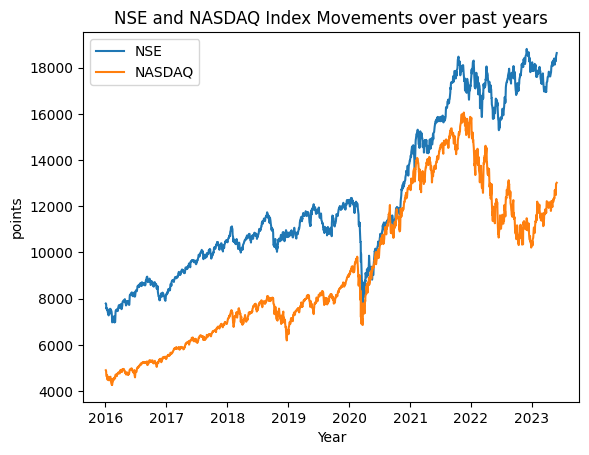

In [274]:
plt.plot(NSE['Close'], label='NSE')
plt.plot(NASDAQ['Close'], label='NASDAQ')
plt.ylabel('points')
plt.xlabel('Year')
plt.title('NSE and NASDAQ Index Movements over past years')
plt.legend()
plt.show()

On close analysis over short period of time, we can infer from the graph of both the indices that for a strong uptrend or downtrend, NASDAQ index is in leading phase although the index point of NSE is much higher than that of NASDAQ. For applying indicator we should use NASDAQ index i.e. the leading index because as per history analysis when the downtrend or uptrend is going to be happened in the NSE index it is priorly observed in the NASDAQ index.

##INDICATORS

Keltner Channel

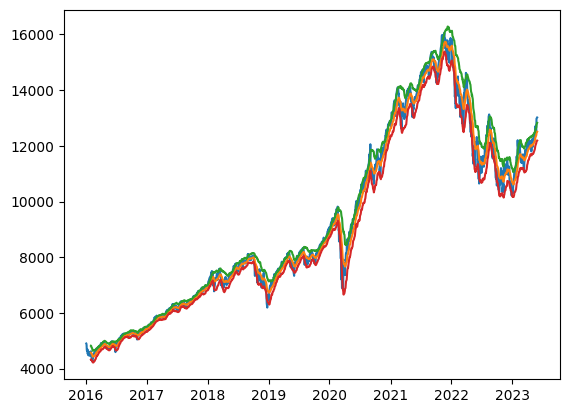

In [275]:
True_range = pd.DataFrame([NASDAQ.High - NASDAQ.Low, abs(NASDAQ.High - NASDAQ.Close.shift(1)), abs(NASDAQ.Low - NASDAQ.Close.shift(1))]).max()
ATR = True_range.rolling(14).mean()
Middle = NASDAQ['Close'].ewm(span = 20, min_periods = 20).mean()
upper = Middle + 2*ATR
lower = Middle - 2*ATR

plt.plot(NASDAQ.Close)
plt.plot(Middle)
plt.plot(upper)
plt.plot(lower)

Bollinger Bands

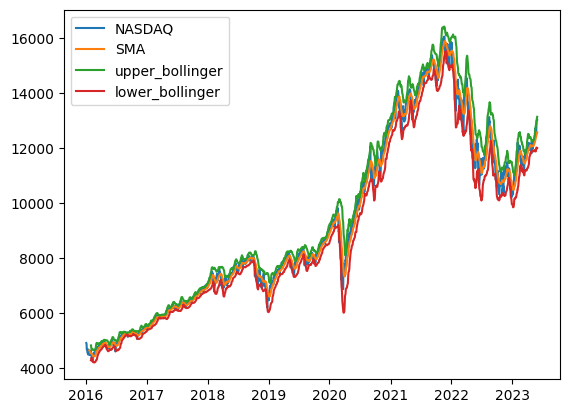

In [276]:
SMA = NASDAQ.Close.rolling(14).mean()
t_p = (NASDAQ.High + NASDAQ.Close + NASDAQ.Low)/3
sd = t_p.rolling(20).std()
upper_bollinger = SMA + 2*sd
lower_bollinger = SMA - 2*sd

plt.plot(NASDAQ.Close , label='NASDAQ')  
plt.plot(SMA,label='SMA')
plt.plot(upper_bollinger, label='upper_bollinger')
plt.plot(lower_bollinger, label='lower_bollinger')
plt.legend()

Moving Average Convergence and Divergence

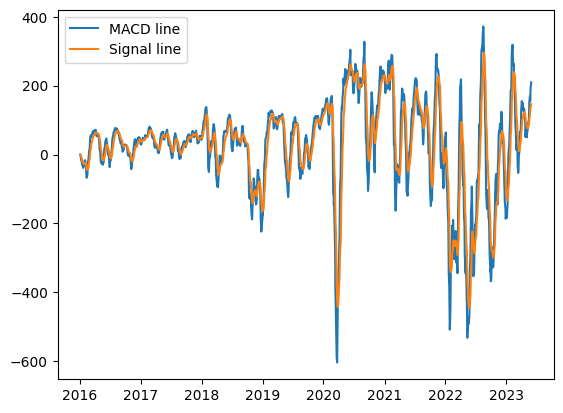

In [277]:
MACD_line = NASDAQ.Close.ewm(span = 12).mean() - NASDAQ.Close.ewm(span = 26).mean()
Signal_line = MACD_line.ewm(span = 14).mean()
plt.plot(MACD_line, label='MACD line')
plt.plot(Signal_line, label='Signal line')
plt.legend()

##OPTIMISATION

(1.) For Keltner Channel : Optimised parameters are: (i) The EMA of middle line should be over 20 day period.
                                                     (ii) The average true range should be taken for 10day moving average.
                                                    
                                                    
                     Buy signal is generated when the price trend hits the lower line of keltner channel.
                     Sell signal is generated when the price trend hits the upper line of keltner channel.

(2.) FOr Bollinger Bands : Optimised parameters are: (i) Again the signals are best given for bollinger bands when we take the rolling
                                                         period to be of 6 months and smoothening period should be 50 days.
                                                    
                                                    
                     Same buy and sell signals are generated in this indicator also as there is no change in 
                     method calculation of this indicator with respect to keltner channel as the only difference is
                     in the upper line which is ATR and SD in keltner channel and bollinger band respectively.

(3.)For MACD : Optimised parameters : (i) For MACD line difference of 10 and 21 Exponential Moving Average
                                      (ii) signal line smoothening should be of 20EMA
                                   
                                   
                      Buy signal is generated when the MACD line crosses over the signal line whereas the sell signal
                     is generated when the signal line crosses over the MACD line.
                

##SIGNAL GENERATION and Applying on NSE and finding cumulative returns, sharpe ratio and max drawdown

For MACD

In [278]:
NSE['macd_line'] = NSE.Close.ewm(span = 10).mean() - NSE.Close.ewm(span = 21).mean()
NSE['signal_line'] = NSE['macd_line'].ewm(span = 20).mean()

NSE['Buy_Signal'] = np.where(NSE['macd_line'] > NSE['signal_line'], 1, 0)
NSE['Sell_Signal'] = np.where(NSE['macd_line'] < NSE['signal_line'], 1, 0)
NSE['daily_returns'] =(NSE['Close']-NSE['Open'])/NSE['Open']
NSE['D_R'] = np.where(NSE['Buy_Signal'] > NSE['Sell_Signal'], NSE['daily_returns'], -NSE['daily_returns'])
NSE_macd_cumulative_return= (NSE['D_R'] + 1).product() -1

NSE['cumulative_rolling_max'] = (NSE['D_R'] + 1).cumprod()-1
drawdown = NSE_macd_cumulative_return - NSE['cumulative_rolling_max']
NSE_macd_Max_drawdown = np.min(drawdown)

annual_returns= NSE['D_R'].mean()*252
risk_free_rate = 0.035
annual_std_dev = NSE['D_R'].std()*np.sqrt(252)
NSE_macd_Sharpe_ratio=(annual_returns-risk_free_rate) / annual_std_dev

print(NSE_macd_Max_drawdown)
print(NSE_macd_cumulative_return)
print(NSE_macd_Sharpe_ratio)

-0.0909597730589482
3.204324059005346
1.221795881759188


KELTNER CHANNEL

In [279]:
NSE.drop(['Buy_Signal', 'Sell_Signal','macd_line', 'signal_line','daily_returns', 'D_R','cumulative_rolling_max'], axis=1, inplace = True)

True_range = pd.DataFrame([NSE.High - NSE.Low, abs(NSE.High - NSE.Close.shift(1)), abs(NSE.Low - NSE.Close.shift(1))]).max()
NSE['ATR'] = True_range.rolling(18).mean()
NSE['Middle'] = NSE['Close'].ewm(span = 20, min_periods = 20).mean()
NSE['upper'] = Middle + 2*ATR
NSE['lower'] = Middle - 2*ATR


NSE['Buy_Signal'] = np.where(NSE['Close'] < NSE['lower'], 1, 0)
NSE['Sell_Signal'] = np.where(NSE['Close'] > NSE['upper'], 1, 0)
NSE['daily_returns'] =(NSE['Close']-NSE['Open'])/NSE['Open']
NSE['D_R'] = np.where(NSE['Buy_Signal'] > NSE['Sell_Signal'], NSE['daily_returns'], -NSE['daily_returns'])
NSE_kc_cumulative_return= (NSE['D_R'] + 1).product() -1

NSE['cumulative_rolling_max'] = (NSE['D_R'] + 1).cumprod()-1
drawdown = NSE_kc_cumulative_return - NSE['cumulative_rolling_max']
NSE_kc_Max_drawdown = np.min(drawdown)

annual_returns= NSE['D_R'].mean()*252
risk_free_rate = 0.035
annual_std_dev = NSE['D_R'].std()*np.sqrt(252)
NSE_kc_Sharpe_ratio=(annual_returns-risk_free_rate) / annual_std_dev

print(NSE_kc_Max_drawdown)
print(NSE_kc_cumulative_return)
print(NSE_kc_Sharpe_ratio)

-0.14009466576379204
2.7650595306675445
1.1139318515233074


BOLLINGER BANDS

In [280]:
NSE.drop(['Buy_Signal', 'Sell_Signal','ATR', 'D_R','upper', 'lower','Middle','daily_returns','cumulative_rolling_max'], axis=1, inplace = True)

NSE['SMA'] = NSE.Close.rolling(180).mean()
NSE['t_p'] = (NSE.Close + NSE.High + NSE.Low)/3
sd = NSE.t_p.rolling(50).std()
NSE['upper_bollinger'] = NSE.SMA + 2*sd
NSE['lower_bollinger'] = NSE.SMA - 2*sd
NSE['Buy_Signal'] = np.where(NSE['Close'] < NSE['lower_bollinger'], 1, 0)
NSE['Sell_Signal'] = np.where(NSE['Close'] > NSE['upper_bollinger'], 1, 0)
NSE['daily_returns'] =(NSE['Close']-NSE['Open'])/NSE['Open']
NSE['D_R'] = np.where(NSE['Buy_Signal'] > NSE['Sell_Signal'], NSE['daily_returns'], -NSE['daily_returns'])
NSE_bb_cumulative_return= (NSE['D_R'] + 1).product() -1

NSE['cumulative_rolling_max'] = (NSE['D_R'] + 1).cumprod()-1
drawdown = NSE_bb_cumulative_return - NSE['cumulative_rolling_max']
NSE_bb_Max_drawdown = np.min(drawdown)

annual_returns= NSE['D_R'].mean()*252
risk_free_rate = 0.035
annual_std_dev = NSE['D_R'].std()*np.sqrt(252)
NSE_bb_Sharpe_ratio=(annual_returns-risk_free_rate) / annual_std_dev

print(NSE_bb_Max_drawdown)
print(NSE_bb_cumulative_return)
print(NSE_bb_Sharpe_ratio)



-0.1923553212720681
1.3845051132379278
0.6683092934874779
